In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%config InlineBackend.figure_format = 'svg'  # Looks MUCH better than retina
# %config InlineBackend.figure_format = 'retina'

from sklearn import tree

### Load the Data set
df = pd.read_csv("diabetes.csv")

In [19]:
df = df.loc[df['BMI'] > 0]
df = df.loc[df['BloodPressure'] > 0]
df = df.loc[df['Glucose'] > 0]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df[['BloodPressure', 'Age', 'Insulin', 'Glucose', 'BMI', 'Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [ ]:
### Normalization
X_norm = preprocessing.normalize(X, norm='l2')

In [42]:
### Feature Scaling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

In [43]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [44]:
### Qualitative Evaluation
test_set_y_preds = clf.predict(X_test)
print("Model performance on test set: ")
test_acc = accuracy_score(y_test, test_set_y_preds)
test_prec = precision_score(y_test, test_set_y_preds)
test_rec = recall_score(y_test, test_set_y_preds)
test_f1 = f1_score(y_test, test_set_y_preds)
print("Accuracy %.4f" % test_acc)
print("Precision %.4f" % test_prec)
print("Recall %.4f" % test_rec)
print("F1 %.4f" % test_f1)

print("\nModel performance on training set: ")
training_set_y_preds = clf.predict(X_train)
train_acc = accuracy_score(y_train, training_set_y_preds)
train_prec = precision_score(y_train, training_set_y_preds)
train_rec = recall_score(y_train, training_set_y_preds)
train_f1 = f1_score(y_train, training_set_y_preds)
print("Accuracy %.4f" % train_acc)
print("Precision %.4f" % train_prec)
print("Recall %.4f" % train_rec)
print("F1 %.4f" % train_f1)

print("\nDifference in Performance: ")
print("Accuracy %.4f" % (train_acc-test_acc))
print("Precision %.4f" % (train_prec-test_prec))
print("Recall %.4f" % (train_rec-test_rec))
print("F1 %.4f" % (train_f1-test_f1))

Model performance on test set: 
Accuracy 0.6828
Precision 0.4545
Recall 0.3488
F1 0.3947

Model performance on training set: 
Accuracy 0.7375
Precision 0.6800
Recall 0.4951
F1 0.5730

Difference in Performance: 
Accuracy 0.0547
Precision 0.2255
Recall 0.1463
F1 0.1783


In [62]:
#### This is me just messing around now, so idk

from sklearn.metrics import f1_score

f1s_test = []
accs_test = []

# Calculating f1 score for K values between 1 and 40 for test set
for i in range(1, 40):
    knn = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))])
#    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s_test.append(f1_score(y_test, pred_i))
    accs_test.append(accuracy_score(y_test, pred_i))

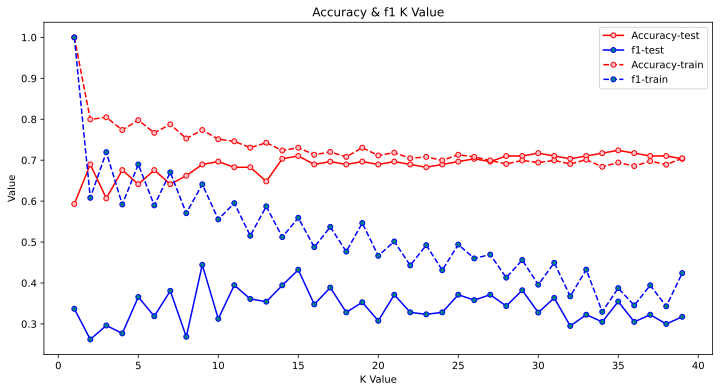

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accs_test, color='red', linestyle='solid', marker='o',
         markerfacecolor='pink', markersize=5, label='Accuracy-test')
plt.plot(range(1, 40), f1s_test, color='blue', linestyle='solid', marker='o',
         markerfacecolor='teal', markersize=5, label='f1-test')
plt.plot(range(1, 40), accs_train, color='red', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=5, label='Accuracy-train')
plt.plot(range(1, 40), f1s_train, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='teal', markersize=5, label='f1-train')
plt.title('Accuracy & f1 K Value')
plt.xlabel('K Value')
plt.ylabel('Value')
plt.legend()
plt.show()